In [1]:
# import standard data science packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import json
sns.set()

In [2]:
# read json object
with open('ultimate_data_challenge.json') as f:
   rider_retention = json.load(f)

# convert object into dataframe
rider_retention_df = pd.DataFrame(rider_retention)

In [3]:
rider_retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
rider_retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
rider_retention_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


## Missing Data

From the `.info()` method, there are 50,000 entries for this dataframe. Additionally, some of the columns do not have the same amount of non-null entries. This hints that those columns have null values. To check, we return a list of columns which have missing values.

In [6]:
rider_retention_df.columns[rider_retention_df.isnull().any()]

Index(['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'], dtype='object')

Of the columns with null values, `avg_rating_of_driver` and `avg_rating_by_driver` are fillable. In order to prevent the data from affecting the results of our predictor, we must first check for outliers to determine whether we should fill the data with the mean of the column or the median of the column. This can be done quickly by plotting a boxplot of each column. 

Text(0.5, 0, 'Average Rating of Driver')

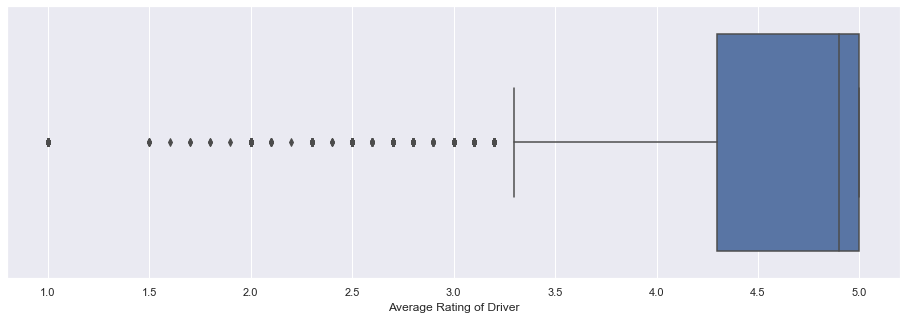

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))

sns.boxplot(x=rider_retention_df.avg_rating_of_driver, ax=ax)
ax.set_xlabel('Average Rating of Driver')

Text(0.5, 0, 'Average Rating by Driver')

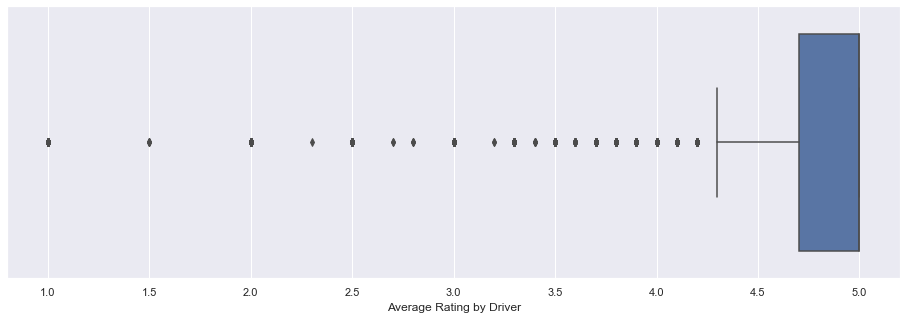

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))

sns.boxplot(x=rider_retention_df.avg_rating_by_driver, ax=ax)
ax.set_xlabel('Average Rating by Driver')

From these boxplots, there are clear outliers within the data. These ratings are all within the scale of 1-5 stars. This means they are not caused by measurement or data entry errors and are valid. They likely represent bad experiences between the customer and driver. Because there are outliers present in the data, it is better to fill missing values with the median. 

In [9]:
rider_retention_df['avg_rating_by_driver'].fillna(rider_retention_df['avg_rating_by_driver'].median(), inplace=True)
rider_retention_df['avg_rating_of_driver'].fillna(rider_retention_df['avg_rating_of_driver'].median(), inplace=True)

Regarding the null entries in the `phone` category, The initial thought process was to impute the missing values using KNN. This could be done using the `fancyimpute` package. This may be incorrect however, as missing data could represent users who do not use either an iPhone or an Android. Because of this, the missing values will instead be treated as their own category. 

In [10]:
rider_retention_df['phone'].fillna('Other', inplace=True)

In [11]:
# Verify data cleaning steps 

rider_retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Outliers

We now check for outliers in the remaining columns. We do this by defining a function which plots a boxplot for each nunmerical column. 

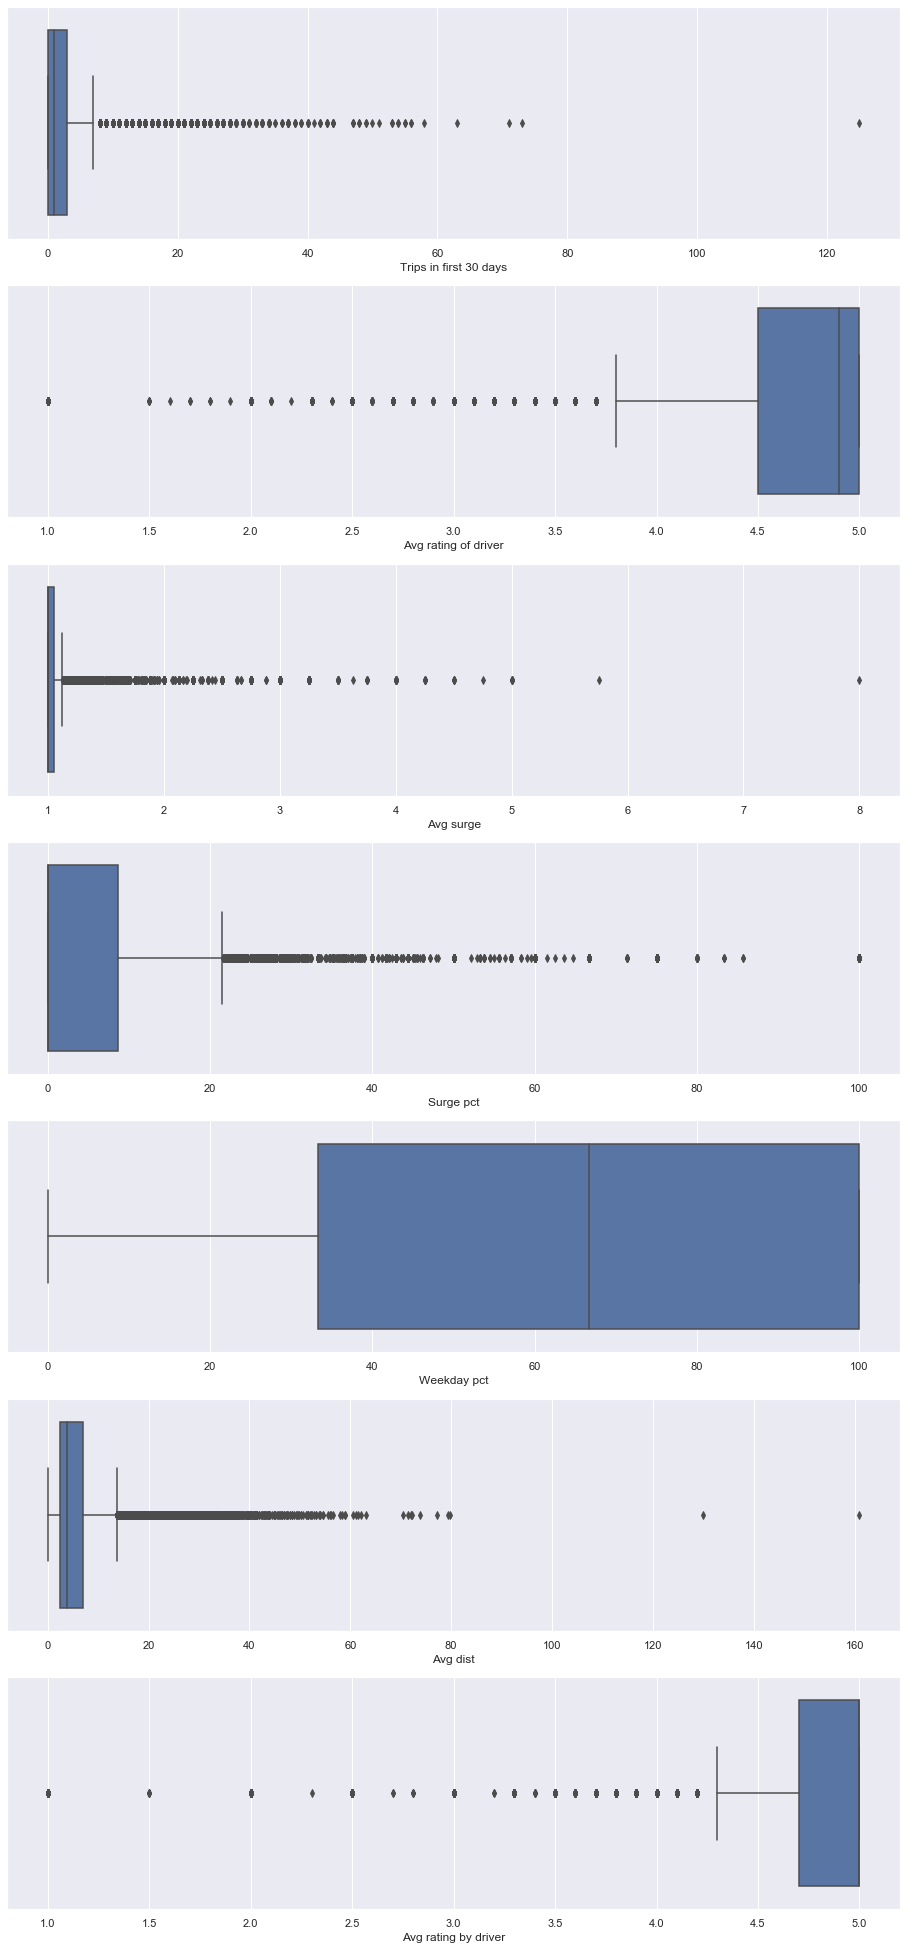

In [12]:
def build_boxplots(column_list, df): 
    nrows = len(column_list)
    
    fix, axes = plt.subplots(nrows=nrows, figsize=(16, nrows*5)) # each subplot will have height of ~ 5 units
    
    for column, ax in zip(column_list, axes): 
        sns.boxplot(x=df[column], ax=ax)
        xlabel = column.replace('_', ' ').capitalize() # format label
        ax.set_xlabel(xlabel)
    
# acquire column names of numerical cols and convert into list
columns = list(rider_retention_df.select_dtypes(include=['int64', 'float64']).columns)
build_boxplots(columns, rider_retention_df)

For the sake of time, we will analyze one of columns with a very distinct outlier: `trips_in_first_30_days`. We notice one rider specifically who completed over 120 rides within their first 30 days. In order to validate this, we will extract their average ride distance and weekday percentage.  

In [13]:
max_trips = rider_retention_df.trips_in_first_30_days.max()
rider_retention_df[rider_retention_df.trips_in_first_30_days == max_trips]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
18514,King's Landing,125,2014-01-02,5.0,1.12,2014-06-30,iPhone,14.4,True,72.0,2.02,4.8


Based on the weekday percentage and average distance, we can see that this data point is valid. The majority of their rides occur during the weekday, and cover a very short distance. It is possible that this rider was using the ride service entirely as their mode of transportation. 

## Retention 

We will now create a column quantifying the difference between each member's signup date and the date of their last trip. We treat the member as retained if the difference between their signup date and the date of their last trip is at least six months.

In [14]:
# check type of date columns 
rider_retention_df[['signup_date', 'last_trip_date']].dtypes

signup_date       object
last_trip_date    object
dtype: object

In [15]:
# convert data into datetime columns 
rider_retention_df['signup_date'] = pd.to_datetime(rider_retention_df['signup_date'])
rider_retention_df['last_trip_date'] = pd.to_datetime(rider_retention_df['last_trip_date'])

# verify 
rider_retention_df[['signup_date', 'last_trip_date']].dtypes

signup_date       datetime64[ns]
last_trip_date    datetime64[ns]
dtype: object

In [16]:
rider_retention_df['signup_last_trip_date_difference'] = (rider_retention_df['last_trip_date'] - rider_retention_df['signup_date']).astype('timedelta64[D]')

# Convert to months 
rider_retention_df['signup_last_trip_date_difference'] = rider_retention_df['signup_last_trip_date_difference'] / 30
rider_retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_last_trip_date_difference
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,4.766667
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,3.200000
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.033333
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.666667
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1.566667


In [17]:
rider_retention_df['retained'] = rider_retention_df['signup_last_trip_date_difference'] >= 6

rider_retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_last_trip_date_difference,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,4.766667,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,3.200000,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.033333,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.666667,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1.566667,False


# Predictive model 

In order to build a predictive model for rider retention, the `retained` column will be used to create a logistic regression model. The coefficients of the model will determine which features are the best predictors of rider retention.  

## Preprocessing

In [18]:
# In order to use the `signup_date` column, we will extract only the date of when they signed up, since we know these are all
# clients who signed up in January of 2014. We will `ignore the last_trip_date` column because it is collinear with the labels.

rider_retention_df['signup_date'] = rider_retention_df['signup_date'].dt.day

# Next we will one hot encode the `phone` column 
one_hot = pd.get_dummies(rider_retention_df.phone)
rider_retention_df = rider_retention_df.drop('phone', axis = 1)
rider_retention_df = rider_retention_df.join(one_hot)

rider_retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_last_trip_date_difference,retained,Android,Other,iPhone
0,King's Landing,4,25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,4.766667,False,0,0,1
1,Astapor,0,29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,3.200000,False,1,0,0
2,Astapor,3,6,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0.033333,False,0,0,1
3,King's Landing,9,10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,5.666667,False,0,0,1
4,Winterfell,14,27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,1.566667,False,1,0,0


In [19]:
# Next, the city column needs to be addressed. We first check the number of unique cities in the dataset. 
rider_retention_df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [20]:
# Because there are only three cities within this dataset, it is reasonable to one hot encode the `city` column.

one_hot = pd.get_dummies(rider_retention_df.city)
rider_retention_df = rider_retention_df.drop('city', axis = 1)
rider_retention_df = rider_retention_df.join(one_hot)

rider_retention_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_last_trip_date_difference,retained,Android,Other,iPhone,Astapor,King's Landing,Winterfell
0,4,25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,4.766667,False,0,0,1,0,1,0
1,0,29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,3.200000,False,1,0,0,1,0,0
2,3,6,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0.033333,False,0,0,1,1,0,0
3,9,10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,5.666667,False,0,0,1,0,1,0
4,14,27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,1.566667,False,1,0,0,0,0,1


In [21]:
# Finally, we convert the boolean columns `ultimate_black_user` and `retained` into integers so they may be used by the models. 
rider_retention_df.ultimate_black_user = rider_retention_df.ultimate_black_user.apply(int)
# rider_retention_df.retained = rider_retention_df.retained.apply(int)

rider_retention_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_last_trip_date_difference,retained,Android,Other,iPhone,Astapor,King's Landing,Winterfell
0,4,25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,4.766667,False,0,0,1,0,1,0
1,0,29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,3.200000,False,1,0,0,1,0,0
2,3,6,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0.033333,False,0,0,1,1,0,0
3,9,10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,5.666667,False,0,0,1,0,1,0
4,14,27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1.566667,False,1,0,0,0,0,1


## Logistic Regression

In [22]:
# import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix

# hide warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# define feature and label columns 
# *Note we must also exclude the `signup_last_trip_date_difference` column because it is highly correlated with the label column. 
excluded_cols = ['last_trip_date', 'signup_last_trip_date_difference', 'retained']
feature_cols = [col for col in rider_retention_df.columns if col not in excluded_cols]
X = rider_retention_df[feature_cols]
y = rider_retention_df.retained 

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Instantiate LogisticRegression model and fit to training data
clf = LogisticRegressionCV(random_state=101, solver='liblinear', cv=5).fit(X_train, y_train)

# Predict on testing data
pred = clf.predict(X_test)

# View confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[16475     0]
 [   25     0]]

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     16475
        True       0.00      0.00      0.00        25

    accuracy                           1.00     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       1.00      1.00      1.00     16500



In [23]:
for coef, feat in zip(clf.coef_[0], feature_cols): 
    print(f'{feat:<23}: {coef:>7.4f}')

trips_in_first_30_days : -0.0096
signup_date            : -0.1731
avg_rating_of_driver   : -0.0939
avg_surge              : -0.0206
surge_pct              : -0.0268
ultimate_black_user    : -0.0070
weekday_pct            : -0.0382
avg_dist               : -0.0829
avg_rating_by_driver   : -0.0956
Android                : -0.0074
Other                  : -0.0002
iPhone                 : -0.0128
Astapor                : -0.0084
King's Landing         : -0.0019
Winterfell             : -0.0101


We notice that the model is predicting entirely true. Based on the confusion matrix, we see that the data is heavily imbalanced towards riders who were not retained. In order to handle this imbalance, we will use the library `imblearn` to implement a technique known as Synthetic Minority Over-sampling Technique(SMOTE). SMOTE works by generating possible new entries using the minority class within the dataset (A great explanation is provided here: http://rikunert.com/SMOTE_explained). 

In [24]:
from imblearn.over_sampling import SMOTE

# Resample the minority class
sm = SMOTE(sampling_strategy='minority', random_state=0)

# Fit the model to generate the data.
os_X_train, os_y_train = sm.fit_sample(X_train, y_train)

os_clf = LogisticRegressionCV(random_state=101, solver='liblinear', cv=5).fit(os_X_train, os_y_train)

os_pred = os_clf.predict(X_test)

# View confusion matrix and classification report
print(confusion_matrix(y_test, os_pred))
print()
print(classification_report(y_test, os_pred))

[[16143   332]
 [   10    15]]

              precision    recall  f1-score   support

       False       1.00      0.98      0.99     16475
        True       0.04      0.60      0.08        25

    accuracy                           0.98     16500
   macro avg       0.52      0.79      0.54     16500
weighted avg       1.00      0.98      0.99     16500



In [25]:
for coef, feat in zip(os_clf.coef_[0], feature_cols): 
    print(f'{feat:<22}: {coef:>7.4f}')

trips_in_first_30_days:  0.1566
signup_date           : -6.8290
avg_rating_of_driver  : -0.2473
avg_surge             : -0.3414
surge_pct             : -0.0273
ultimate_black_user   : -2.2233
weekday_pct           :  0.0071
avg_dist              : -0.1020
avg_rating_by_driver  :  1.1524
Android               : -11.4363
Other                 : -9.7157
iPhone                : -4.9238
Astapor               : -10.0897
King's Landing        : -7.3849
Winterfell            : -8.5964


From the new model's confusion matrix, the model can now predict retained customers. The model was able to predict 61% of the true values within the dataset, but it also predicted many false positives as well. Thus, it is not able to accurately predict whether a rider will be retained. Despite this, the coefficients of the model can still give some insight. We notice that the average rating by the driver and the average rating of the driver were the biggest indicators of rider retention. 

Ultimate can now use this information to focus more on the quality of their drivers. This can be done through a more rigorous screening/hiring process. If Ultimate's drivers provide more pleasant experiences for their customers, the customers are more likely to be retained. 